<a href="https://colab.research.google.com/github/rahul123nayak/Campusx/blob/main/task_23_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('default')

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries Iran and China.

In [2]:
# code here
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [3]:
iran_series = df.query('Country == "Iran"').groupby('Year')['PM2.5'].sum()
china_series = df.query('Country == "China"').groupby('Year')['PM2.5'].sum()

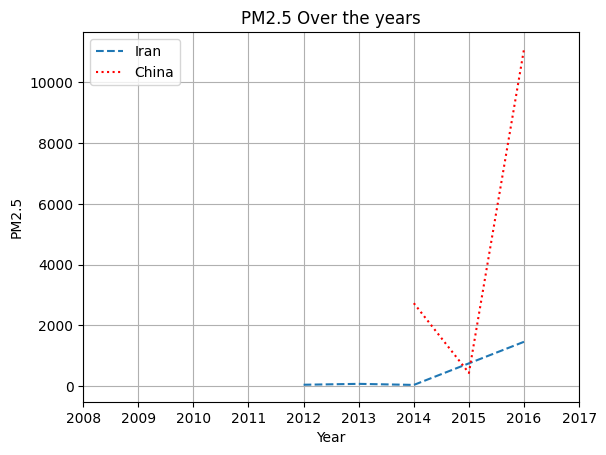

In [4]:
plt.plot(iran_series.index,iran_series.values,label='Iran',linestyle='dashed')
plt.plot(china_series.index,china_series.values,label='China',linestyle='dotted',color='red')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.title('PM2.5 Over the years')
plt.xticks(df['Year'].value_counts().index)
plt.legend()
plt.grid()
plt.show()

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability).

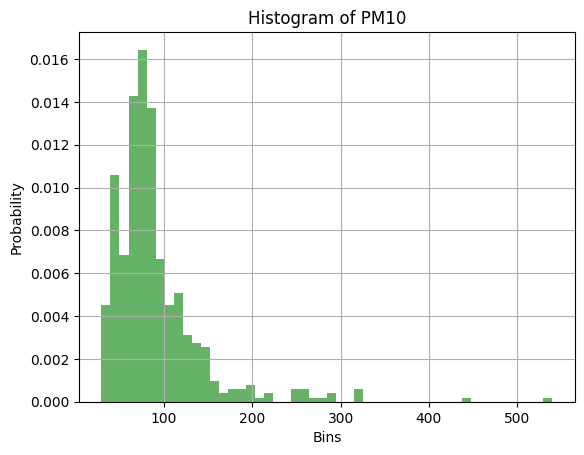

In [5]:
# code here
plt.hist(df['PM10'],density=True,bins=50,facecolor='green',alpha=0.6)
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.title('Histogram of PM10')
plt.grid()
plt.show()

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

In [6]:
# code here
chile_df = df.query("Country == 'Chile'")
poland_df = df.query("Country == 'Poland'")

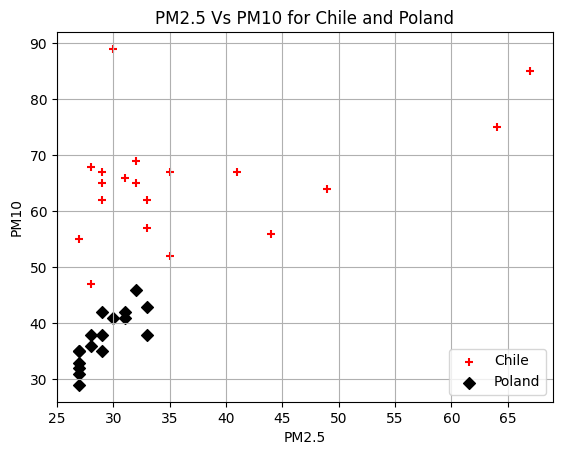

In [7]:
plt.scatter(chile_df['PM2.5'],chile_df['PM10'],marker="+",color='red',label='Chile')
plt.scatter(poland_df['PM2.5'],poland_df['PM10'],marker="D",color='black',label='Poland')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('PM2.5 Vs PM10 for Chile and Poland')
plt.legend()
plt.grid()
plt.show()

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

In [ ]:
# code here
freq_ser = df['Country'].value_counts().head()

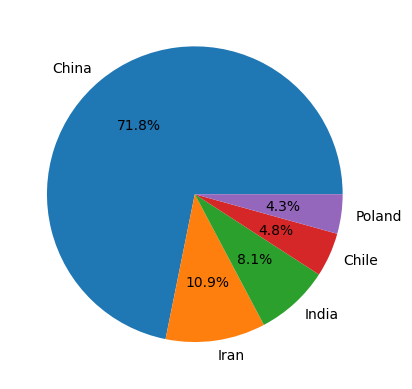

In [ ]:
plt.pie(freq_ser,labels=freq_ser.index,autopct='%0.1f%%')
plt.show()

### **`Problem-5:`** Draw a bar chart which represents the counts of top 5 most frequent countries.



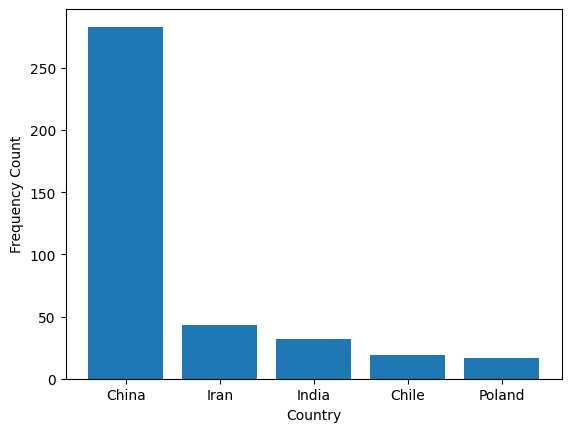

In [ ]:
# code here
plt.bar(freq_ser.index,freq_ser)
plt.xlabel('Country')
plt.ylabel('Frequency Count')
plt.show()

##`Problem 6-10`
Data Set - https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv

This is a Sales data of any company in a Year.


###`Problem-6`
Show a line plot of Total Profit for each month with below styling.
* Dotted Line
* Line Color Blue
* Show Legend at top left
* Circle Marker

In [8]:
# code here
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv')
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


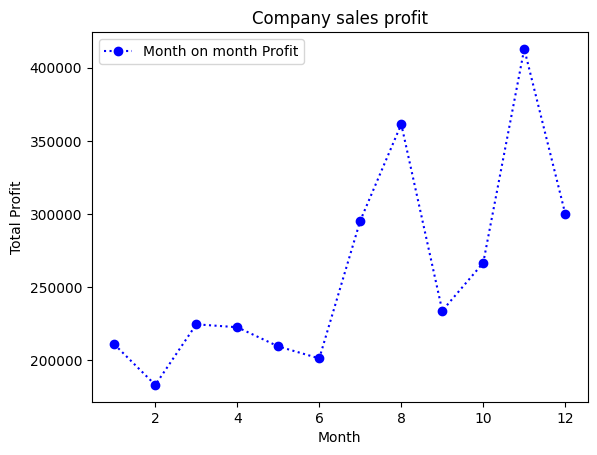

In [9]:
plt.plot(df['month_number'],df['total_profit'],label='Month on month Profit',color='b',marker='o',linestyle='dotted')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Company sales profit')
plt.legend(loc="upper left")
plt.show()

###`Problem-7`
Show sales of each product in march month as pie chart.
* Show Percentage value
* Give Title "Sales in March"
* Explode ToothPaste with shadow

In [10]:
# code here
labels = df[df['month_number'] == 3].iloc[:,1:7].stack().index.get_level_values(1)
values = df[df['month_number'] == 3].iloc[:,1:7].stack().values

In [11]:
labels

Index(['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo',
       'moisturizer'],
      dtype='object')

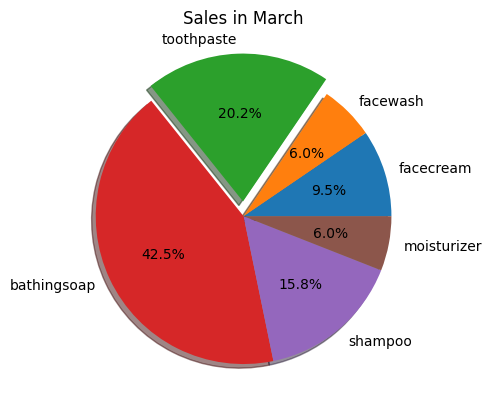

In [13]:
plt.pie(values,labels=labels,autopct='%0.1f%%',explode=[0,0,0.1,0,0,0],shadow=True)
plt.title("Sales in March")
plt.show()

###`Problem-8` Multiline Plot of all products sales.
* Give different styes for each products
* Add legend at top right

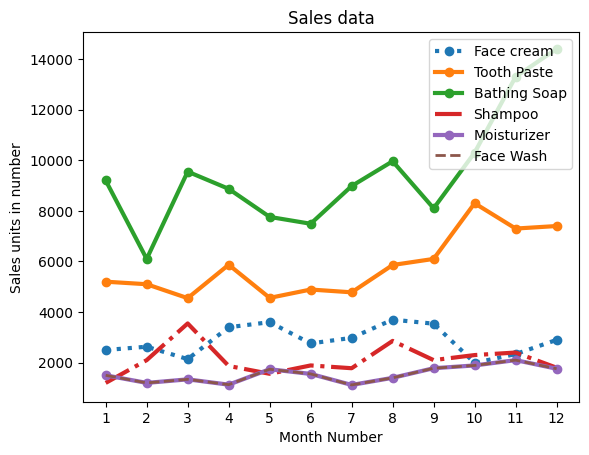

In [ ]:
# code here
monthList  = df['month_number'].tolist()

plt.plot(monthList, df['facecream'],   label = 'Face cream', linestyle='dotted', marker='o', linewidth=3)
plt.plot(monthList, df['toothpaste'], label = 'Tooth Paste', marker='o', linewidth=3)
plt.plot(monthList, df['bathingsoap'], label = 'Bathing Soap', marker='o', linewidth=3)
plt.plot(monthList, df['shampoo'], label = 'Shampoo', linestyle='dashdot', linewidth=3)
plt.plot(monthList, df['moisturizer'], label = 'Moisturizer', marker='o', linewidth=3)
plt.plot(monthList, df['facewash'],   label = 'Face Wash',  linestyle='dashed', linewidth=2)


plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper right')
plt.xticks(monthList)
plt.title('Sales data')
plt.show()

###`Problem-9` Show Quarter wise Sales data for all products as multi Bar chart.


In [16]:
# code here
df['date'] = pd.to_datetime(['2020-{}-01'.format(month) for month in df['month_number']])

In [27]:
final_df = df.groupby(df['date'].dt.quarter).sum()

TypeError: datetime64 type does not support sum operations

In [25]:
final_df

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7e40eca09cc0>>

In [26]:
i = -1
for col in final_df.columns[1:7]:
  plt.bar([a+i for a in final_df.index],final_df[col],width=0.15,label=col)
  i = i - 0.15

plt.xticks(final_df.index-1.4,final_df.index)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.legend()
plt.show()

AttributeError: 'function' object has no attribute 'columns'

In [ ]:
final_df.iloc[:,1:7]

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
date,,,,,,
1,7270,4040,14850,24850,6850,4040
2,9760,4425,15320,24120,5320,4425
3,10220,4300,16740,27040,6740,4300
4,7230,5750,23000,38000,6500,5750


###`Problem-10` Plot Stacked Bar chart quarter wise for each product.

In [ ]:
# code here
final_df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
date,,,,,,,,,
1,6,7270,4040,14850,24850,6850,4040,61900,619000
2,15,9760,4425,15320,24120,5320,4425,63370,633700
3,24,10220,4300,16740,27040,6740,4300,89090,890900
4,33,7230,5750,23000,38000,6500,5750,97970,979700


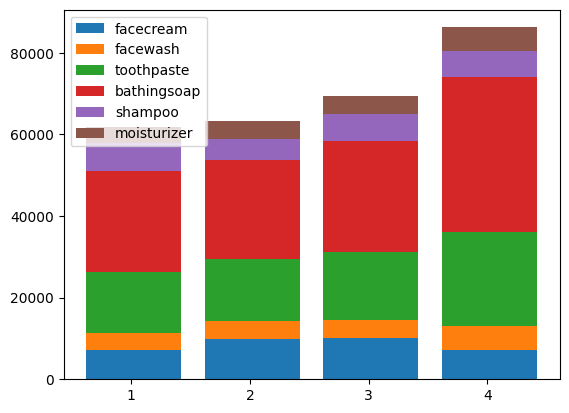

In [ ]:
all_cols = []

for col in final_df.columns[1:7]:
  if len(all_cols) == 0:
    plt.bar(final_df.index,final_df[col],label=col)
  else:
    plt.bar(final_df.index,final_df[col],bottom=sum(all_cols),label=col)
  all_cols.append(final_df[col])

plt.xticks(final_df.index - 0.02, final_df.index)
plt.legend()
plt.show()

In [ ]:
sum(all_cols)

date
1    61900
2    63370
3    69340
4    86230
dtype: int64